In [5]:
import random
import re
from datetime import date
from pathlib import Path
from typing import Union

import SimpleITK as sitk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
print(os.getcwd())
from os.path import join
import sys
sys.path.append('/media/medical/gasperp/projects/monai_3D_U_net')
from src import project_config
sys.path.append(project_config.projects_dir_path)
from utilities import utilities, visualization_functions
from src.nnUnet import nnunet_config
from src.nnUnet.plotting_jupyters import plot_functions, special_cases

/media/medical/gasperp/projects/nnUnet_clone/nnUNet/results
/media/medical/gasperp/projects/nnUnet_clone/nnUNet/results


# ISBI plots

## LOAD 150

In [17]:
dataset = "Task150_onkoi-2019-batch-1-and-2-both-modalities-all-organs-new"
note = 'ct1_vs_ct2'
stat_test = 'Mann-Whitney'
df = pd.read_csv(
    os.path.join(
        f"/media/medical/projects/head_and_neck/nnUnet/{dataset}/results/", 
        f"results.csv",
    )
)
df.loc[df['parameters'].isna(), 'parameters'] = '/'

In [18]:
# print(df['comment'].unique())
# df['source_label_dir'] = df['source_label_files'].str.split('/', expand=True).iloc[:,-2]
# df['source_label_dir'].loc[df['source_label_dir'].isna()] = 'none'
# df['source_dataset'] = df['source_images'].str.split('/', expand=True).iloc[:,5]
# print(df['source_dataset'].unique())
# df['source_dataset'].replace({'Head-Neck-Radiomics-HN1': 'HN1', 'PDDCA': 'PDDCA', 'onkoi_2019': 'ONKOI'}, inplace=True)

# df = df[df['comment'].isin(['113 is ref'])] #, '112 mri_1 is gt', '112 mri_2 is gt', '112 staple_ct'])]]
df
#df['source_images'].isin(special_cases.cropped_cases)
#msk = df['source_images'].str.rsplit('/', expand=True, n=1).iloc[:,0].isin(special_cases.cropped_cases)
#df = df[~msk]
df

,Unnamed: 0,organ_name,organ_label,metric,value,parameters,model_task_number,model_task_name,fold,trainer_class,plans_name,checkpoint,prediction_mode,phase,fname
0,0,Arytenoids,1,volumetric_dice,0.906736,/,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,train,onkoi-2019-batch-1-and-2-both-modalities-all-o...
1,1,Arytenoids,1,assd,0.062648,/,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,train,onkoi-2019-batch-1-and-2-both-modalities-all-o...
2,2,Arytenoids,1,hausdorff,0.557617,percentile=95,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,train,onkoi-2019-batch-1-and-2-both-modalities-all-o...
3,3,Arytenoids,1,average_surface_distance,0.062569,function=mean,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,train,onkoi-2019-batch-1-and-2-both-modalities-all-o...
4,4,Arytenoids,1,surface_dice_at_tolerance,1.000000,tolerance_mm=2.0,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,train,onkoi-2019-batch-1-and-2-both-modalities-all-o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,5110,nII_R,31,volumetric_dice,0.688032,/,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,test,onkoi-2019-batch-1-and-2-both-modalities-all-o...
5111,5111,nII_R,31,assd,0.331924,/,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,test,onkoi-2019-batch-1-and-2-both-modalities-all-o...
5112,5112,nII_R,31,hausdorff,2.000000,percentile=95,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,test,onkoi-2019-batch-1-and-2-both-modalities-all-o...
5113,5113,nII_R,31,average_surface_distance,0.331003,function=mean,150,Task150_onkoi-2019-batch-1-and-2-both-modaliti...,all,nnUNetTrainerV2_noMirroringAxis2,nnUNetPlansv2.1,model_final_checkpoint,fastest,test,onkoi-2019-batch-1-and-2-both-modalities-all-o...


In [19]:
df_pivot_150 = pd.pivot_table(df, values='value', index=['fname'], columns=['model_task_name', 'trainer_class', 'plans_name', 'checkpoint', 'prediction_mode', 'fold', 'phase', 'parameters', 'metric'])
print(df_pivot_150.shape)
df_pivot_150

(33, 10)


model_task_name                                    Task150_onkoi-2019-batch-1-and-2-both-modalities-all-organs-new  \
trainer_class                                                                     nnUNetTrainerV2_noMirroringAxis2   
plans_name                                                                                         nnUNetPlansv2.1   
checkpoint                                                                                  model_final_checkpoint   
prediction_mode                                                                                            fastest   
fold                                                                                                           all   
phase                                                                                                         test   
parameters                                                                                                       /   
metric                                                                                                        assd   
fname                                                                                                                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN                
onkoi-2019-batch-1-and-2-both-modalities-all-or...                                                NaN     

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

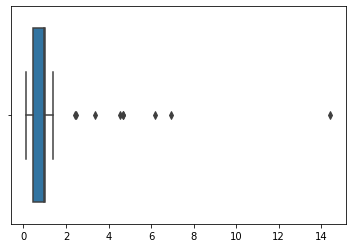

In [13]:
plt.figure()
sns.boxplot(df_pivot_150.values)

## LOAD 129

In [4]:
dataset = "Task129_PDDCA-HN1-ONKOI-double-reference-onkoi-10-train-20-test-noBadCasesInTrain"
note = 'ct1_vs_ct2'
stat_test = 'Mann-Whitney'
df = pd.read_csv(
    os.path.join(
        f"/media/medical/projects/head_and_neck/nnUnet/{dataset}/results/", 
        f"results.csv",
    )
)
print(df['comment'].unique())
df['source_label_dir'] = df['source_label_files'].str.split('/', expand=True).iloc[:,-2]
df['source_label_dir'].loc[df['source_label_dir'].isna()] = 'none'
df['source_dataset'] = df['source_images'].str.split('/', expand=True).iloc[:,5]
print(df['source_dataset'].unique())
df['source_dataset'].replace({'Head-Neck-Radiomics-HN1': 'HN1', 'PDDCA': 'PDDCA', 'onkoi_2019': 'ONKOI'}, inplace=True)
df = df[df['comment'].isin(['local'])]
print(df['source_dataset'].unique())
#df['source_images'].isin(special_cases.cropped_cases)
#msk = df['source_images'].str.rsplit('/', expand=True, n=1).iloc[:,0].isin(special_cases.cropped_cases)
#df = df[~msk]
df

['local' '113 is ref']
['onkoi_2019' 'PDDCA' 'Head-Neck-Radiomics-HN1']
['ONKOI' 'PDDCA' 'HN1']



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,filename,label,value,phase,fold,metric,source_dataset,source_images,source_label_files,gt_dataset,pred_dataset,post-p,comment,source_label_dir
0,0,local/train/PDDCA-HN1-ONKOI-double-reference-o...,1,0.885251,train,all,MeanDice,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
1,1,local/train/PDDCA-HN1-ONKOI-double-reference-o...,2,0.890338,train,all,MeanDice,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
2,2,local/train/PDDCA-HN1-ONKOI-double-reference-o...,1,1.802776,train,all,HD95,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
3,3,local/train/PDDCA-HN1-ONKOI-double-reference-o...,2,2.500000,train,all,HD95,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
4,4,local/train/PDDCA-HN1-ONKOI-double-reference-o...,1,0.435742,train,all,AvgSurfaceDist,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,2065,local/test/PDDCA-HN1-ONKOI-double-reference-on...,2,0.489769,test,all,AvgSurfaceDist,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
2066,2066,local/test/PDDCA-HN1-ONKOI-double-reference-on...,1,0.946721,test,all,SurfaceDice,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
2067,2067,local/test/PDDCA-HN1-ONKOI-double-reference-on...,2,0.985474,test,all,SurfaceDice,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1
2068,2068,local/test/PDDCA-HN1-ONKOI-double-reference-on...,1,0.729522,test,all,ASSD,ONKOI,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,Task129_PDDCA-HN1-ONKOI-double-reference-onkoi...,cc,local,ct_masks_1


In [5]:
df_pivot_129 = pd.pivot_table(df, values='value', index=['source_images'], columns=['source_dataset', 'source_label_dir', 'metric', 'phase', 'fold', 'label'])
print(df_pivot_129.shape)
df_pivot_129.head()

(177, 80)


source_dataset                                           HN1                   \
source_label_dir                                        none                    
metric                                                  ASSD                    
phase                                                   test            train   
fold                                                     all              all   
label                                                      1      2         1   
source_images                                                                   
/media/medical/projects/head_and_neck/Head-Neck...       NaN    NaN  0.394677   
/media/medical/projects/head_and_neck/Head-Neck...       NaN    NaN  0.347156   
/media/medical/projects/head_and_neck/Head-Neck...  1.085687  1.091       NaN   
/media/medical/projects/head_and_neck/Head-Neck...       NaN    NaN  0.345134   
/media/medical/projects/head_and_neck/Head-Neck...       NaN    NaN  0.299638   

source_dataset                                                               \
source_label_dir                                                              
metric                                                       AvgSurfaceDist   
phase                                                                  test   
fold                                                                    all   
label                                                      2              1   
source_images                                                                 
/media/medical/projects/head_and_neck/Head-Neck...  0.438070            NaN   
/media/medical/projects/head_and_neck/Head-Neck...  0.276621            NaN   
/media/medical/projects/head_and_neck/Head-Neck...       NaN       1.090669   
/media/medical/projects/head_and_neck/Head-Neck...  0.372479            NaN   
/media/medical/projects/head_and_neck/Head-Neck...  0.335588            NaN   

source_dataset                                                          \
source_label_dir                                                         
metric                                                                   
phase                                                            train   
fold                                                               all   
label                                                      2         1   
source_images                                                            
/media/medical/projects/head_and_neck/Head-Neck...       NaN  0.389503   
/media/medical/projects/head_and_neck/Head-Neck...       NaN  0.337093   
/media/medical/projects/head_and_neck/Head-Neck...  1.092675       NaN   
/media/medical/projects/head_and_neck/Head-Neck...       NaN  0.333684   
/media/medical/projects/head_and_neck/Head-Neck...       NaN  0.287164   

source_dataset                                                          \
source_label_dir                                                         
metric                                                            HD95   
phase                                                             test   
fold                                                               all   
label                                                      2         1   
source_images                                                            
/media/medical/projects/head_and_neck/Head-Neck...  0.424871       NaN   
/media/medical/projects/head_and_neck/Head-Neck...  0.270302       NaN   
/media/medical/projects/head_and_neck/Head-Neck...       NaN  3.354102   
/media/medical/projects/head_and_neck/Head-Neck...  0.361137       NaN   
/media/medical/projects/head_and_neck/Head-Neck...  0.323126       NaN   

source_dataset                                                ... PDDCA      \
source_label_dir                                              ...  none       
metric                                                        ...  HD95       
phase                                                         .

In [6]:
msk = df_pivot_129.loc[:, ('ONKOI', slice(None), slice(None), 'test', slice(None), slice(None))].notna().any(axis=1)
onkoi_test_paths = df_pivot_129[msk].index.tolist()
print(len(onkoi_test_paths))
onkoi_test_paths

20


['/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/02/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/03/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/04/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/06/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/07/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/08/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/09/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/10/preprocessed/elastix_spline23/ct.nii.gz',
 '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/1

## LOAD 113 CT1 vs CT2

In [7]:
dataset = "Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed"
note = 'ct1_vs_ct2'
stat_test = 'Mann-Whitney'
df = pd.read_csv(
    os.path.join(
        f"/media/medical/projects/head_and_neck/nnUnet/{dataset}/results/", 
        f"results.csv",
    )
)
#df = df[df['comment']=='ct1 vs ct2']
msk = df['source_images'].isin(onkoi_test_paths)
df = df[msk]
df

,Unnamed: 0,filename,label,value,phase,fold,metric,source_dataset,source_images,source_label_files,gt_dataset,pred_dataset,post-p,comment
10,10,Task113_onkoi-2019-double-reference-10-train-2...,1,0.831631,unknown,0,MeanDice,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
11,11,Task113_onkoi-2019-double-reference-10-train-2...,2,0.824620,unknown,0,MeanDice,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
12,12,Task113_onkoi-2019-double-reference-10-train-2...,1,3.201562,unknown,0,HD95,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
13,13,Task113_onkoi-2019-double-reference-10-train-2...,2,3.041381,unknown,0,HD95,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
14,14,Task113_onkoi-2019-double-reference-10-train-2...,1,0.754072,unknown,0,AvgSurfaceDist,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Task113_onkoi-2019-double-reference-10-train-2...,2,0.512187,unknown,0,AvgSurfaceDist,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
296,296,Task113_onkoi-2019-double-reference-10-train-2...,1,0.921102,unknown,0,SurfaceDice,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
297,297,Task113_onkoi-2019-double-reference-10-train-2...,2,0.983069,unknown,0,SurfaceDice,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113
298,298,Task113_onkoi-2019-double-reference-10-train-2...,1,1.109352,unknown,0,ASSD,onkoi-2019-double-reference-10-train-20-test-n...,/media/medical/projects/head_and_neck/onkoi_20...,/media/medical/projects/head_and_neck/onkoi_20...,Task113_onkoi-2019-double-reference-10-train-2...,Task113_onkoi-2019-double-reference-10-train-2...,NaN,ct1 vs ct2 113


In [8]:
df_pivot_IOV = pd.pivot_table(df, values='value', index=['source_images'], columns=['metric', 'phase', 'fold', 'label'])
print(df_pivot_IOV.shape)
# df_pivot_IOV.reset_index(inplace=True)
df_pivot_IOV

(20, 10)


metric                                                  ASSD            \
phase                                                unknown             
fold                                                       0             
label                                                      1         2   
source_images                                                            
/media/medical/projects/head_and_neck/onkoi_201...  1.578883  0.973587   
/media/medical/projects/head_and_neck/onkoi_201...  0.685026  0.576041   
/media/medical/projects/head_and_neck/onkoi_201...  1.109352  0.513059   
/media/medical/projects/head_and_neck/onkoi_201...  0.552534  7.869337   
/media/medical/projects/head_and_neck/onkoi_201...  1.075356  0.867059   
/media/medical/projects/head_and_neck/onkoi_201...  0.784368  0.765128   
/media/medical/projects/head_and_neck/onkoi_201...  0.908018  0.379227   
/media/medical/projects/head_and_neck/onkoi_201...  0.519716  0.345758   
/media/medical/projects/head_and_neck/onkoi_201...  0.845885  0.790411   
/media/medical/projects/head_and_neck/onkoi_201...  0.824580  1.016462   
/media/medical/projects/head_and_neck/onkoi_201...  1.036577  3.720614   
/media/medical/projects/head_and_neck/onkoi_201...  0.628744  0.620837   
/media/medical/projects/head_and_neck/onkoi_201...  1.526122  3.047795   
/media/medical/projects/head_and_neck/onkoi_201...  0.911064  1.376543   
/media/medical/projects/head_and_neck/onkoi_201...  0.978686  2.417938   
/media/medical/projects/head_and_neck/onkoi_201...  0.889639  1.213510   
/media/medical/projects/head_and_neck/onkoi_201...  4.191797  4.746065   
/media/medical/projects/head_and_neck/onkoi_201...  0.383438  0.878117   
/media/medical/projects/head_and_neck/onkoi_201...  0.647160  0.892484   
/media/medical/projects/head_and_neck/onkoi_201...  0.860560  1.005575   

metric                                             AvgSurfaceDist            \
phase                                                     unknown             
fold                                                            0             
label                                                           1         2   
source_images                                                                 
/media/medical/projects/head_and_neck/onkoi_201...       1.474019  0.961391   
/media/medical/projects/head_and_neck/onkoi_201...       0.685367  0.576109   
/media/medical/projects/head_and_neck/onkoi_201...       1.117157  0.512187   
/media/medical/projects/head_and_neck/onkoi_201...       0.525532  6.387129   
/media/medical/projects/head_and_neck/onkoi_201...       1.086738  0.863116   
/media/medical/projects/head_and_neck/onkoi_201...       0.754072  0.742911   
/media/medical/projects/head_and_neck/onkoi_201...       0.889016  0.378969   
/media/medical/projects/head_and_neck/onkoi_201...       0.519727  0.344840   
/media/medical/projects/head_and_neck/onkoi_201...       0.835545  0.791611   
/media/medical/projects/head_and_neck/onkoi_201...       0.810115  0.956451   
/media/medical/projects/head_and_neck/onkoi_201...       1.034385  2.867432   
/media/medical/projects/head_and_neck/onkoi_201...       0.628408  0.617694   
/media/medical/projects/head_and_neck/onkoi_201...       1.466959  2.917844   
/media/medical/projects/head_and_neck/onkoi_201...       0.907553  1.360837   
/media/medical/projects/head_and_neck/onkoi_201...       0.930684  2.208148   
/media/medical/projects/head_and_neck/onkoi_201...       0.889895  1.145232   
/media/medical/projects/head_and_neck/onkoi_201...       3.282799  3.852515   
/media/medical/projects/head_and_neck/onkoi_201...       0.377382  0.878935   
/media/medical/projects/head_and_neck/onkoi_201...       0.647777  0.894046   
/media/medical/projects/head_and_neck/onkoi_201...       0.823110  0.989682   

metric                                                   HD95             \
phase                                                 unknown              
fold                 

In [9]:
filter_bad_cases = True
reference_comments = ['ct_masks_1', 'ct_masks_2'] #, '111 staple_ct']
dataset_subset_dict = {'HN1': {'': slice(None)}, 
                       'PDDCA': {'': slice(None)},
                       'ONKOI': {'SENIOR': 'ct_masks_1', 'JUNIOR': 'ct_masks_2'}}
phase = ['test']
figsize=(25, 8)
plots_format = 'pdf'
show_statistics = True
save_plots = False

In [10]:
# filter bad cases
if filter_bad_cases:
    df_pivot_124['index1'] = df_pivot_124.index
    msk = df_pivot_124['index1'].str.rsplit('/', expand=True, n=1).iloc[:,0].isin(special_cases.cropped_cases)
    df_pivot_124 = df_pivot_124[~msk]
    
    df_pivot_129['index1'] = df_pivot_129.index
    msk = df_pivot_129['index1'].str.rsplit('/', expand=True, n=1).iloc[:,0].isin(special_cases.cropped_cases)
    df_pivot_129 = df_pivot_129[~msk]
    
    df_pivot_IOV['index1'] = df_pivot_IOV.index
    msk = df_pivot_IOV['index1'].str.rsplit('/', expand=True, n=1).iloc[:,0].isin(special_cases.cropped_cases)
    df_pivot_IOV = df_pivot_IOV[~msk]

## Dice

In [32]:
metric = 'MeanDice'
fold = 'all'
ylimits = [-0.015, 1.015]
text_height = 0.15

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1. HN1,  v.s. 1. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.881e-05 U_stat=1.600e+01
1. PDDCA,  v.s. 1. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.227e-04 U_stat=2.380e+02
1. ONKOI, SENIOR v.s. 1. ONKOI, JUNIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.210e+02
1. ONKOI, JUNIOR v.s. ONKOI IOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.090e+02
ONKOI IOV v.s. 2. HN1, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.370e+02
2. HN1,  v.s. 2. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.590e-05 U_stat=1.700e+01
2. PDDCA,  v.s. 2. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two

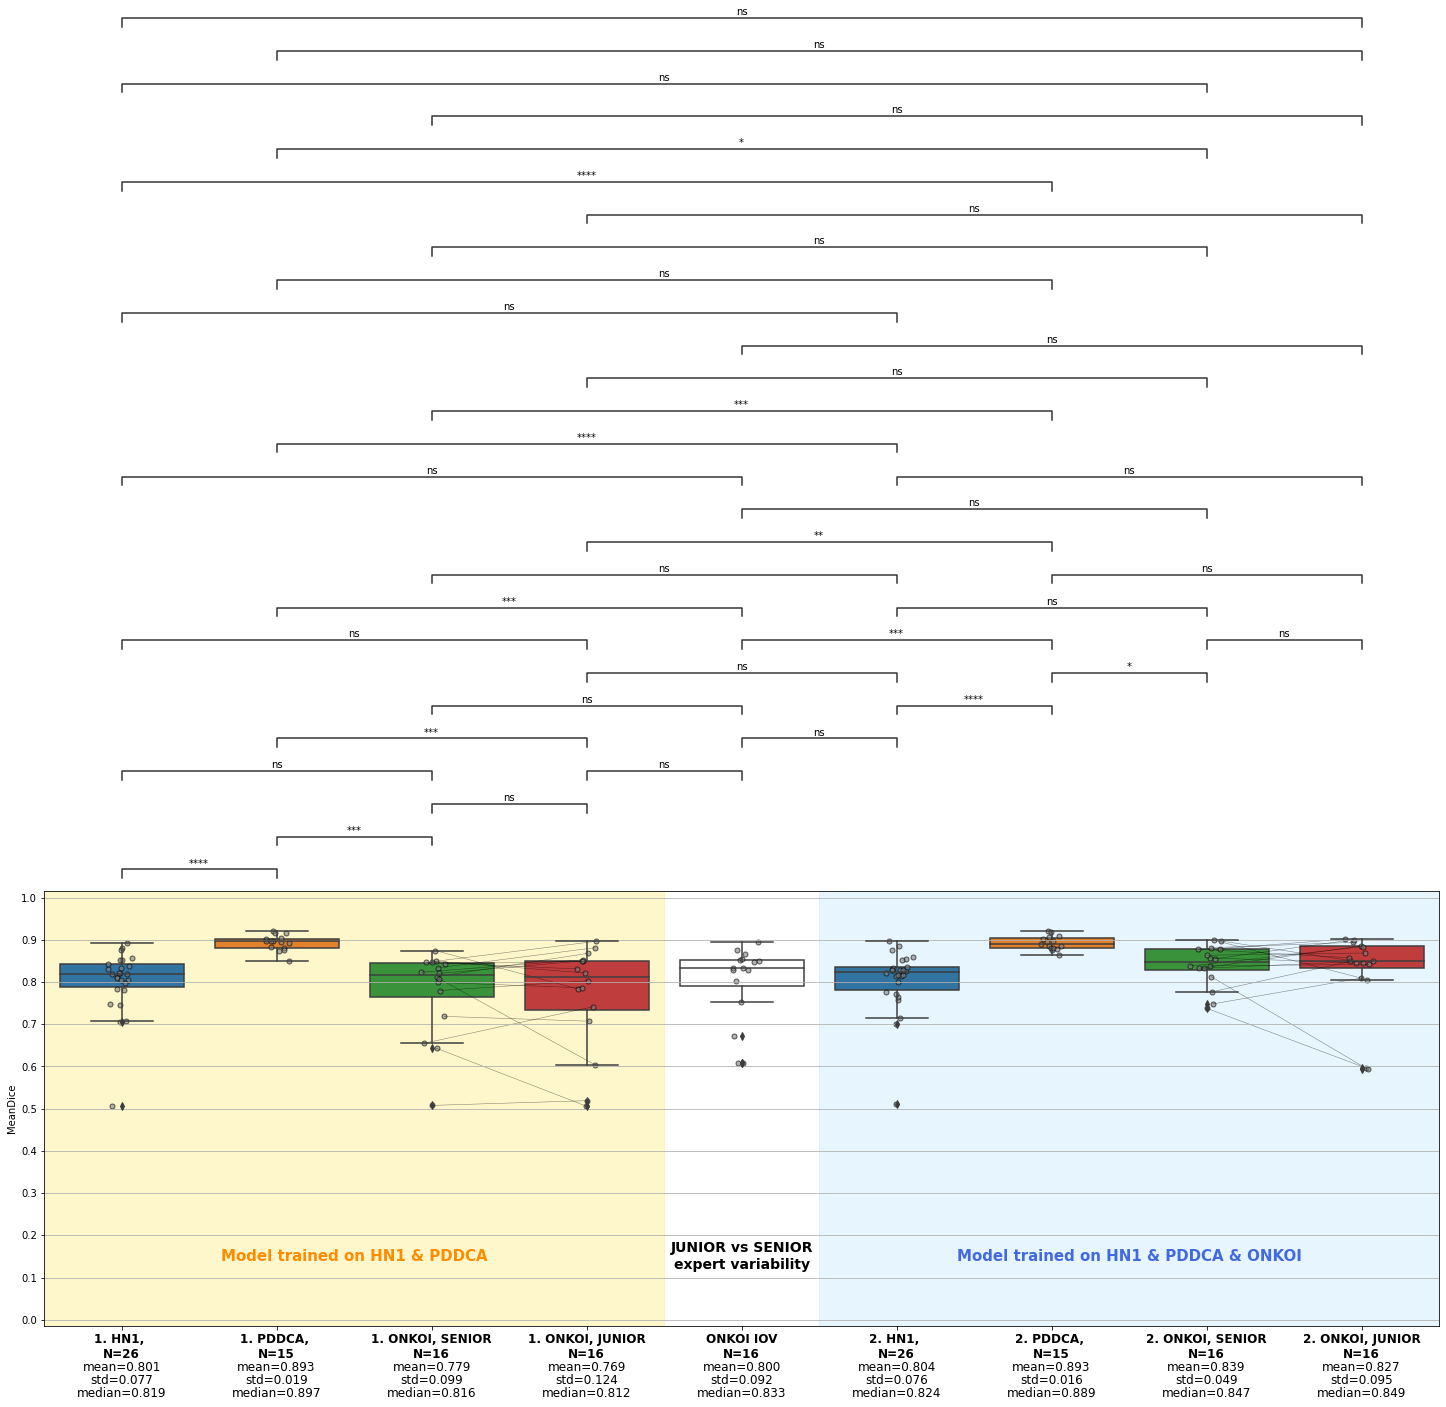

In [33]:
_df = pd.DataFrame()
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_124.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'1. {_ds}, {_subset_name}'] = _t
_t = df_pivot_IOV.loc[:, (metric)].mean(axis=1).reset_index(drop=True)
_df = _df.append(pd.DataFrame(index=_t.index))
_df[f'ONKOI IOV'] = _t
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_129.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'2. {_ds}, {_subset_name}'] = _t
ax = plot_functions.make_boxplot(_df, figsize=figsize, ylimits=ylimits, metric=metric, y_ticks=None, add_lineplot=True, y_label=None, statistics=show_statistics, statistics_kwargs={'test': stat_test})
c_bg = 'gold'
c_text = 'darkorange'
fontsize=15
plt.axvspan(-0.5, 3.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(1.5, text_height, 'Model trained on HN1 & PDDCA', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
c_bg = 'lightskyblue'
c_text = 'royalblue'
plt.axvspan(4.5, 8.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(6.5, text_height, 'Model trained on HN1 & PDDCA & ONKOI', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
plt.text(4, text_height, 'JUNIOR vs SENIOR\nexpert variability', ha='center', va='center', color='k', fontweight='semibold', fontsize=14)
box_colors = []
for patch in ax.artists:
    box_colors.append(patch.get_facecolor())
for enum, patch in enumerate(ax.artists[5:]):
    patch.set_facecolor(box_colors[enum])
ax.artists[4].set_facecolor((0.5, 0.5, 0.5, 0))
if save_plots: plt.savefig(f'figures/SPIE_{metric}_filtered={filter_bad_cases}.{plots_format}', bbox_inches = 'tight', facecolor='white')

In [13]:
_df[(_df < 0.6).any(axis=1)]
box_colors

[(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1),
 (0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1),
 (0.22941176470588232, 0.5705882352941177, 0.22941176470588232, 1),
 (0.7534313725490196, 0.23872549019607847, 0.24166666666666664, 1),
 (0.5784313725490194, 0.446078431372549, 0.6990196078431372, 1),
 (0.5171568627450981, 0.3583333333333334, 0.3259803921568628, 1),
 (0.8372549019607844, 0.5196078431372548, 0.7401960784313724, 1),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1),
 (0.6622549019607844, 0.6651960784313725, 0.2093137254901961, 1)]

In [36]:
_df.loc[_df.idxmax()]

,"1. HN1,","1. PDDCA,","1. ONKOI, SENIOR","1. ONKOI, JUNIOR",ONKOI IOV,"2. HN1,","2. PDDCA,","2. ONKOI, SENIOR","2. ONKOI, JUNIOR"
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1791/1.3.6.1.4.1.40744.29.184711751979767454876140062582003072423/ct.nii.gz,0.891633,NaN,NaN,NaN,NaN,0.896874,NaN,NaN,NaN
/media/medical/projects/head_and_neck/PDDCA/0522c0598/original/ct.nii.gz,NaN,0.92169,NaN,NaN,NaN,NaN,0.921035,NaN,NaN
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/02/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.874396,0.783586,NaN,NaN,NaN,0.899261,0.805798
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/29/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.847936,0.896280,NaN,NaN,NaN,0.855049,0.900342
6,NaN,NaN,NaN,NaN,0.894518,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1791/1.3.6.1.4.1.40744.29.184711751979767454876140062582003072423/ct.nii.gz,0.891633,NaN,NaN,NaN,NaN,0.896874,NaN,NaN,NaN
/media/medical/projects/head_and_neck/PDDCA/0522c0598/original/ct.nii.gz,NaN,0.92169,NaN,NaN,NaN,NaN,0.921035,NaN,NaN
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/02/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.874396,0.783586,NaN,NaN,NaN,0.899261,0.805798
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/18/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.823104,0.852603,NaN,NaN,NaN,0.878985,0.901510


In [37]:
_df.loc[_df.idxmin()]

,"1. HN1,","1. PDDCA,","1. ONKOI, SENIOR","1. ONKOI, JUNIOR",ONKOI IOV,"2. HN1,","2. PDDCA,","2. ONKOI, SENIOR","2. ONKOI, JUNIOR"
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1308/1.3.6.1.4.1.40744.29.157183145321798851950598418665449371319/ct.nii.gz,0.505959,NaN,NaN,NaN,NaN,0.509942,NaN,NaN,NaN
/media/medical/projects/head_and_neck/PDDCA/0522c0659/original/ct.nii.gz,NaN,0.850865,NaN,NaN,NaN,NaN,0.864418,NaN,NaN
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/09/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.507697,0.518913,NaN,NaN,NaN,0.881206,0.893945
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/16/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.642849,0.506504,NaN,NaN,NaN,0.737945,0.595875
11,NaN,NaN,NaN,NaN,0.607409,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1308/1.3.6.1.4.1.40744.29.157183145321798851950598418665449371319/ct.nii.gz,0.505959,NaN,NaN,NaN,NaN,0.509942,NaN,NaN,NaN
/media/medical/projects/head_and_neck/PDDCA/0522c0659/original/ct.nii.gz,NaN,0.850865,NaN,NaN,NaN,NaN,0.864418,NaN,NaN
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/16/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.642849,0.506504,NaN,NaN,NaN,0.737945,0.595875
/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/19/preprocessed/elastix_spline23/ct.nii.gz,NaN,NaN,0.807592,0.604254,NaN,NaN,NaN,0.812803,0.593157


(64, 512, 512)


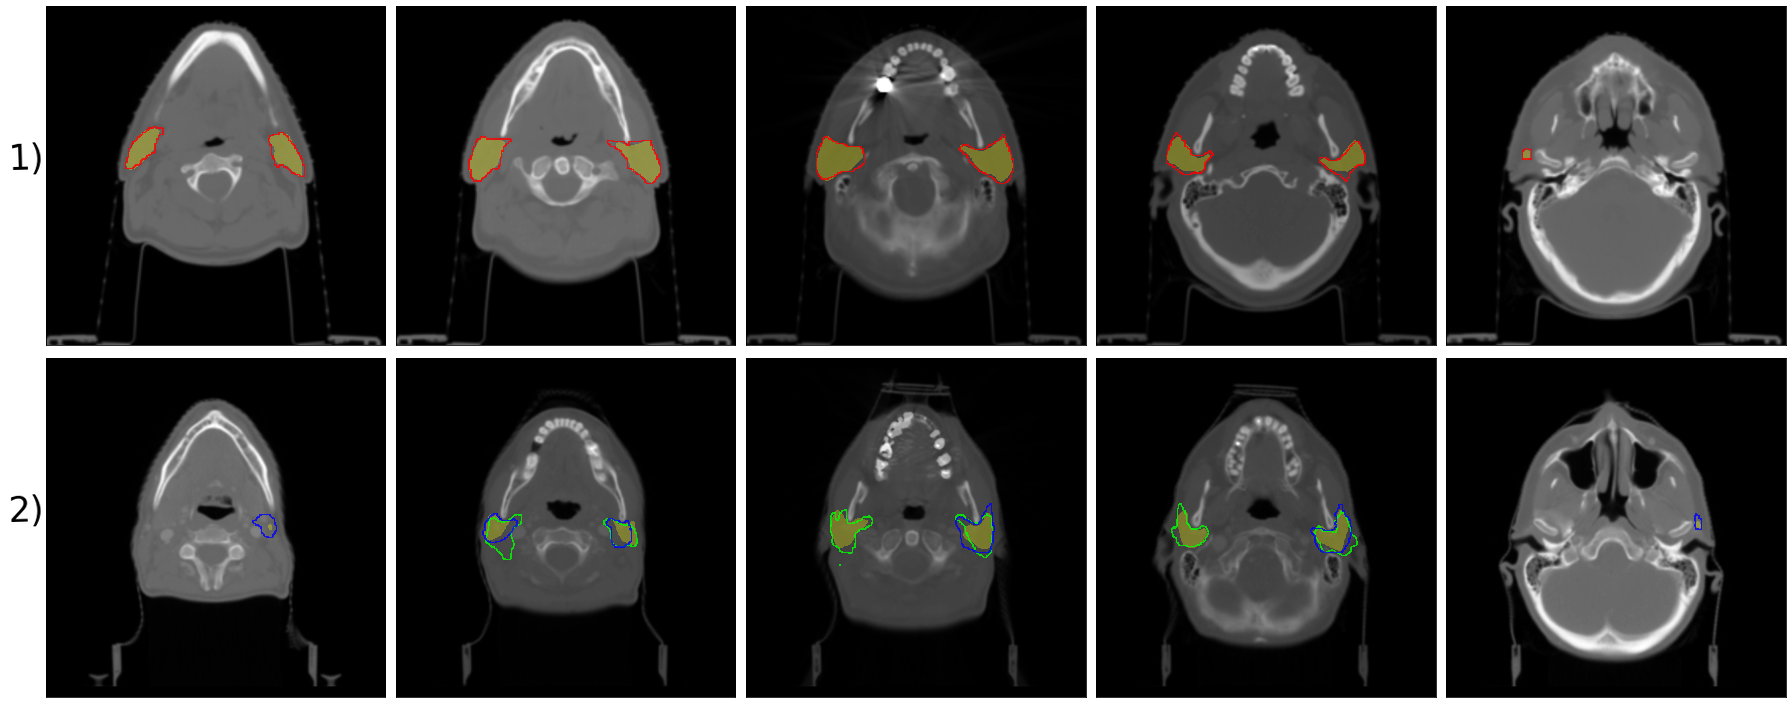

In [111]:
from matplotlib.colors import ListedColormap
import scipy.ndimage as ndimage
good_case = {'raw': '/media/medical/projects/head_and_neck/PDDCA/0522c0598/original/ct.nii.gz', 
             'name': 'PDDCA-HN1_047', 
             'dataset': 'Task124_PDDCA-HN1', 
            'img': '/media/medical/projects/head_and_neck/nnUnet/Task124_PDDCA-HN1/imagesTs/PDDCA-HN1_047_0000.nii.gz', 
            'gt': '/media/medical/projects/head_and_neck/nnUnet/Task124_PDDCA-HN1/labelsTs/PDDCA-HN1_047.nii.gz', 
            'pred': '/media/medical/projects/head_and_neck/nnUnet/Task124_PDDCA-HN1/results/foldall/local/test/PDDCA-HN1_047.nii.gz', }

bad_case = {'raw': '/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/16/preprocessed/elastix_spline23/ct.nii.gz', 
            'name': 'onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_053',
            'dataset': 'Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed',
           'img': '/media/medical/projects/head_and_neck/nnUnet/Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed/imagesTs/onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_053_0000.nii.gz', 
            'pred': '/media/medical/projects/head_and_neck/nnUnet/Task129_PDDCA-HN1-ONKOI-double-reference-onkoi-10-train-20-test-noBadCasesInTrain/results/foldall/Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed/test/onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_053.nii.gz',
            'gt': ['/media/medical/projects/head_and_neck/nnUnet/Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed/labelsTs/onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_053.nii.gz', 
                  '/media/medical/projects/head_and_neck/nnUnet/Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed/labelsTs/onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_054.nii.gz']
           }

def load_sitk_and_to_np(pth):
    img_sitk = sitk.ReadImage(pth)
    spacing = img_sitk.GetSpacing() # cor, sag ,ax
    img_np = sitk.GetArrayFromImage(img_sitk)
    return img_np
def get_edge(slice_np):
    return ndimage.generic_gradient_magnitude(
        slice_np, ndimage.sobel
        ).astype(bool).astype(np.uint8)
def plot_case(axes, slices, image, gt, pred):
    mask_cmap_yellow = ListedColormap([[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0]])
    mask_cmap_red = ListedColormap([[0.0, 0.0, 0.0, 0.0], [1.0, 0, 0.0, 1.0]])
    mask_cmap_blue = ListedColormap([[0.0, 0.0, 0.0, 0.0], [0, 0, 1.0, 1.0]])
    mask_cmap_green = ListedColormap([[0.0, 0.0, 0.0, 0.0], [0, 1.0, 0, 1.0]])
    gt_cmaps = [mask_cmap_green, mask_cmap_blue]
    
    if not isinstance(gt, (list, tuple)):
        gt = [gt]
        gt_cmaps = [mask_cmap_red]
        
    for enum, slc in enumerate(range(20,50,7)):
        ax = axes[enum]
        ax.imshow(image[slc], cmap='gray')
        ax.imshow(pred[slc], alpha=0.3, cmap=mask_cmap_yellow)
        for enum2, g in enumerate(gt):
            ax.imshow(get_edge(gt[enum2][slc]), alpha=0.8, cmap=gt_cmaps[enum2])
            
    [plt.setp(axi.get_xticklabels(), visible=False) for axi in axes.ravel()]
    [plt.setp(axi.get_yticklabels(), visible=False) for axi in axes.ravel()]
    [axi.tick_params(axis='both', which='both', length=0) for axi in axes.ravel()]
    
    
    
img_good = load_sitk_and_to_np(good_case['img'])
gt_good = load_sitk_and_to_np(good_case['gt'])
pred_good = load_sitk_and_to_np(good_case['pred'])
img_bad = load_sitk_and_to_np(bad_case['img'])
pred_bad = load_sitk_and_to_np(bad_case['pred'])
gt_bad = [load_sitk_and_to_np(i) for i in bad_case['gt']]

print(img_good.shape)
fig, axs = plt.subplots(2, 5, figsize=(25,10))
plot_case(axes=axs[0], slices=list(range(20,50,7)), image=img_good, gt=gt_good, pred=pred_good)
plot_case(axes=axs[1], slices=list(range(20,50,7)), image=img_bad, gt=gt_bad, pred=pred_bad)
[axs[i, 0].set_ylabel(f'{i+1})', rotation=np.pi/2, fontsize=35, labelpad=20) for i in range(axs.shape[0])]
plt.tight_layout()
# if save_plots: 
plt.savefig(f'figures/SPIE_best_worst.png', bbox_inches = 'tight', facecolor='white')

## Hausdorff 95<sup>th</sup> percentile

In [98]:
metric = 'HD95'
fold = 'all'
ylimits = [0, 35]
text_height = 32.5

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1. HN1,  v.s. 1. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.441e-01 U_stat=2.955e+02
1. PDDCA,  v.s. 1. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.156e-03 U_stat=2.700e+01
1. ONKOI, SENIOR v.s. 1. ONKOI, JUNIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.330e+02
1. ONKOI, JUNIOR v.s. ONKOI IOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.540e+02
ONKOI IOV v.s. 2. HN1, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.385e+02
2. HN1,  v.s. 2. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.760e-01 U_stat=2.940e+02
2. PDDCA,  v.s. 2. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two

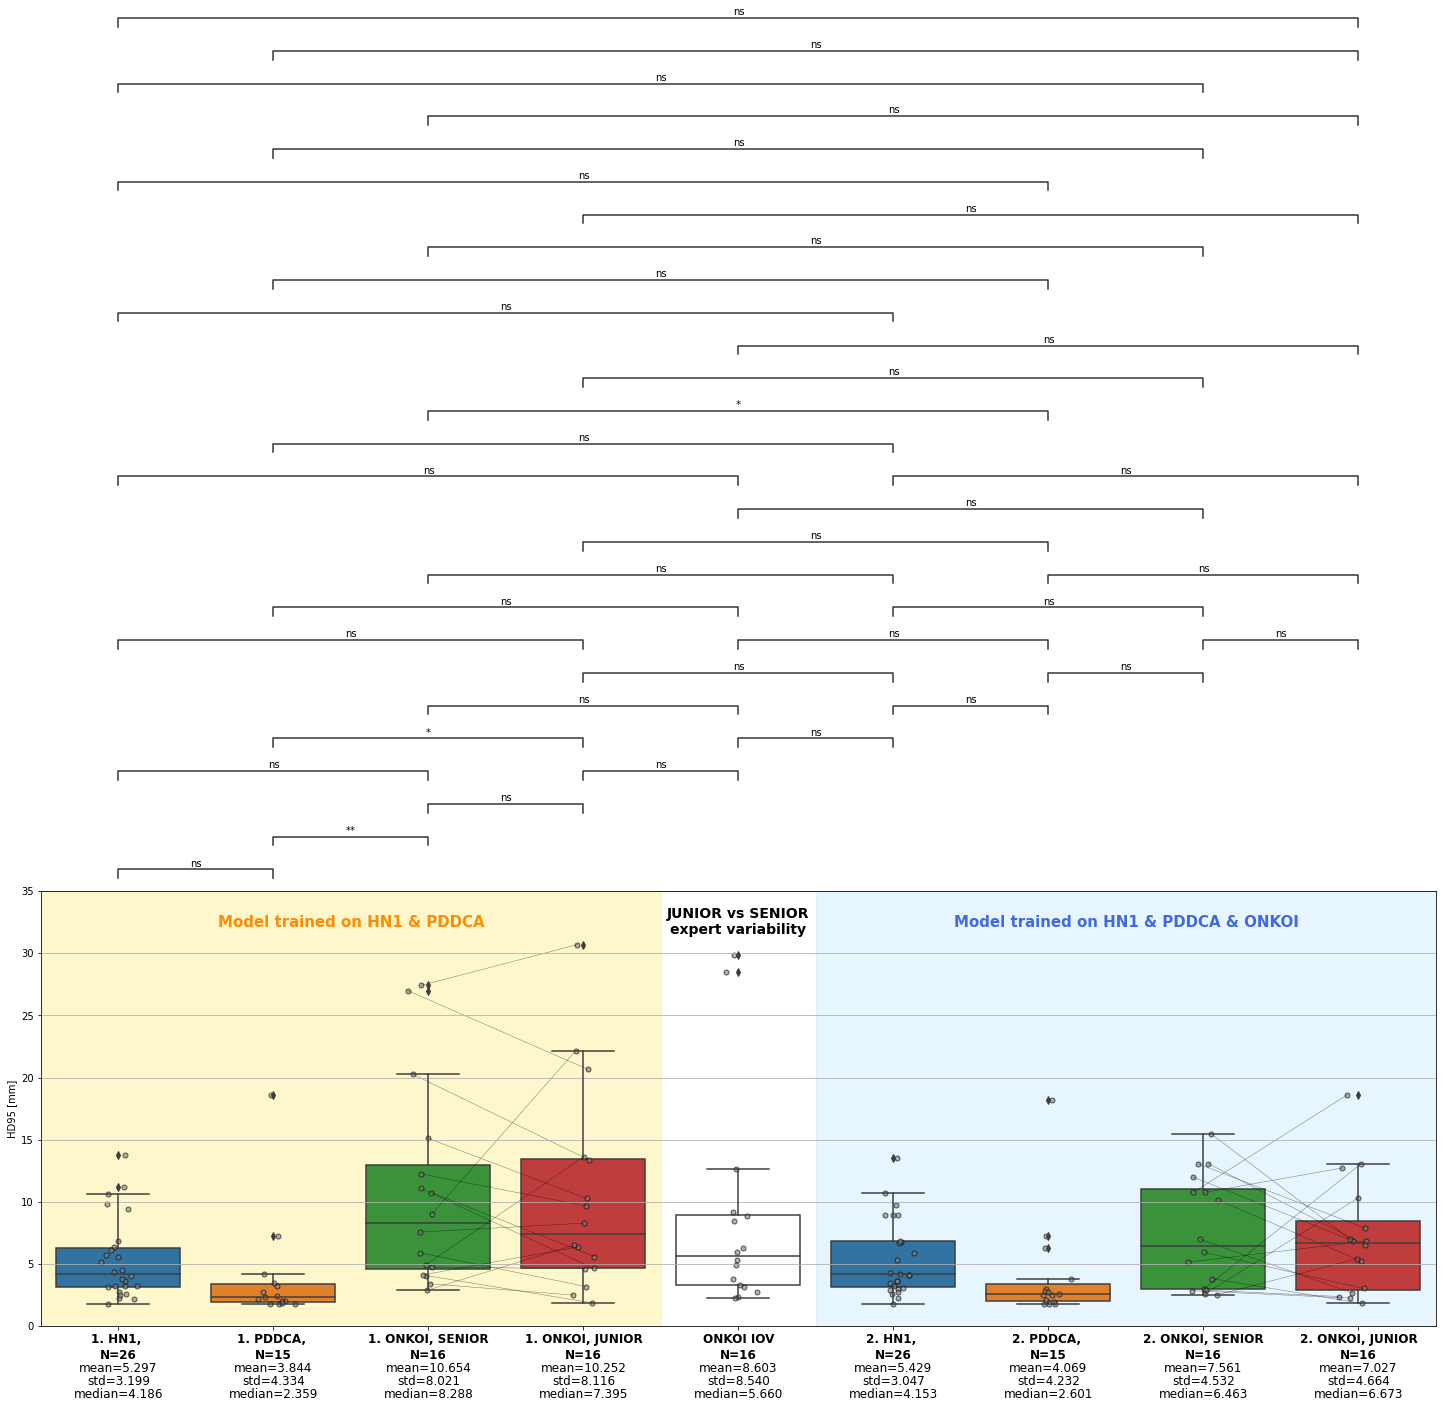

In [104]:
_df = pd.DataFrame()
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_124.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'1. {_ds}, {_subset_name}'] = _t
_t = df_pivot_IOV.loc[:, (metric)].mean(axis=1).reset_index(drop=True)
_df = _df.append(pd.DataFrame(index=_t.index))
_df[f'ONKOI IOV'] = _t
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_129.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'2. {_ds}, {_subset_name}'] = _t
ax = plot_functions.make_boxplot(_df, figsize=figsize, ylimits=ylimits, metric=metric, y_ticks=None, add_lineplot=True, y_label=None, statistics=show_statistics, statistics_kwargs={'test': stat_test})
c_bg = 'gold'
c_text = 'darkorange'
fontsize=15
plt.axvspan(-0.5, 3.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(1.5, text_height, 'Model trained on HN1 & PDDCA', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
c_bg = 'lightskyblue'
c_text = 'royalblue'
plt.axvspan(4.5, 8.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(6.5, text_height, 'Model trained on HN1 & PDDCA & ONKOI', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
plt.text(4, text_height, 'JUNIOR vs SENIOR\nexpert variability', ha='center', va='center', color='k', fontweight='semibold', fontsize=14)
box_colors = []
for patch in ax.artists:
    box_colors.append(patch.get_facecolor())
for enum, patch in enumerate(ax.artists[5:]):
    patch.set_facecolor(box_colors[enum])
ax.artists[4].set_facecolor((0.5, 0.5, 0.5, 0))
if save_plots: plt.savefig(f'figures/SPIE_{metric}_filtered={filter_bad_cases}.{plots_format}', bbox_inches = 'tight', facecolor='white')

In [105]:
df_pivot_IOV.loc[:, (metric)]

phase                                                 unknown           
fold                                                        0           
label                                                       1          2
source_images                                                           
/media/medical/projects/head_and_neck/onkoi_201...  12.589678   5.830952
/media/medical/projects/head_and_neck/onkoi_201...   2.692582   2.061553
/media/medical/projects/head_and_neck/onkoi_201...   5.590170   2.000000
/media/medical/projects/head_and_neck/onkoi_201...   2.872281  54.115617
/media/medical/projects/head_and_neck/onkoi_201...   3.741657   2.915476
/media/medical/projects/head_and_neck/onkoi_201...   3.201562   3.041381
/media/medical/projects/head_and_neck/onkoi_201...  10.500000   2.000000
/media/medical/projects/head_and_neck/onkoi_201...   3.000000   2.500000
/media/medical/projects/head_and_neck/onkoi_201...   6.184658   5.744563
/media/medical/projects/head_and_neck/onkoi_201...   3.605551  14.035669
/media/medical/projects/head_and_neck/onkoi_201...   2.061553   2.500000
/media/medical/projects/head_and_neck/onkoi_201...  12.369317  12.971122
/media/medical/projects/head_and_neck/onkoi_201...   4.582576  12.369317
/media/medical/projects/head_and_neck/onkoi_201...   3.500000   7.211103
/media/medical/projects/head_and_neck/onkoi_201...  24.949950  34.716711
/media/medical/projects/head_and_neck/onkoi_201...   4.527693   5.315073

In [106]:
_df.loc['/media/medical/projects/head_and_neck/PDDCA/0522c0598/original/ct.nii.gz']

1. HN1,                  NaN
1. PDDCA,           1.750000
1. ONKOI, SENIOR         NaN
1. ONKOI, JUNIOR         NaN
ONKOI IOV                NaN
2. HN1,                  NaN
2. PDDCA,           1.780776
2. ONKOI, SENIOR         NaN
2. ONKOI, JUNIOR         NaN
Name: /media/medical/projects/head_and_neck/PDDCA/0522c0598/original/ct.nii.gz, dtype: float64

In [107]:
_df.loc['/media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/16/preprocessed/elastix_spline23/ct.nii.gz']

1. HN1,                   NaN
1. PDDCA,                 NaN
1. ONKOI, SENIOR    27.001736
1. ONKOI, JUNIOR    20.666634
ONKOI IOV                 NaN
2. HN1,                   NaN
2. PDDCA,                 NaN
2. ONKOI, SENIOR    11.989465
2. ONKOI, JUNIOR     6.966517
Name: /media/medical/projects/head_and_neck/onkoi_2019/Original-dcm_conv_2/16/preprocessed/elastix_spline23/ct.nii.gz, dtype: float64

In [17]:
#_df[_df > 20]
_df[_df.notna().any(axis=1)]

,"1. HN1,","1. PDDCA,","1. ONKOI, SENIOR","1. ONKOI, JUNIOR",ONKOI IOV,"2. HN1,","2. PDDCA,","2. ONKOI, SENIOR","2. ONKOI, JUNIOR"
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1022/1.3.6.1.4.1.40744.29.19037093530189411798567915021135260094/ct.nii.gz,4.000000,NaN,NaN,NaN,NaN,4.126541,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1095/1.3.6.1.4.1.40744.29.240830195168378362912464912764997958251/ct.nii.gz,6.337543,NaN,NaN,NaN,NaN,6.755143,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1123/1.3.6.1.4.1.40744.29.171401567607929273384507545734107889856/ct.nii.gz,6.864818,NaN,NaN,NaN,NaN,8.909646,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1139/1.3.6.1.4.1.40744.29.39733875458714122458917355560668535313/ct.nii.gz,3.250000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1146/1.3.6.1.4.1.40744.29.45084863479635845781442267453092995463/ct.nii.gz,3.118034,NaN,NaN,NaN,NaN,3.076225,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11,NaN,NaN,NaN,NaN,12.670219,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,8.475946,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,5.355551,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,29.833330,NaN,NaN,NaN,NaN


In [18]:
#_df.loc['fold0/validation_raw_manual_preprocessed_fold_0/PDDCA-HN1-ONKOI_063.nii.gz']

## Average Surface Distance

In [19]:
metric = 'AvgSurfaceDist'
fold = 'all'
ylimits = [0, 5]
text_height = 4.5

## phases comparison

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1. HN1,  v.s. 1. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.817e-03 U_stat=3.310e+02
1. PDDCA,  v.s. 1. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.202e-04 U_stat=1.300e+01
1. ONKOI, SENIOR v.s. 1. ONKOI, JUNIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.370e+02
1. ONKOI, JUNIOR v.s. ONKOI IOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.420e+02
ONKOI IOV v.s. 2. HN1, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.250e+02
2. HN1,  v.s. 2. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.339e-02 U_stat=3.270e+02
2. PDDCA,  v.s. 2. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two

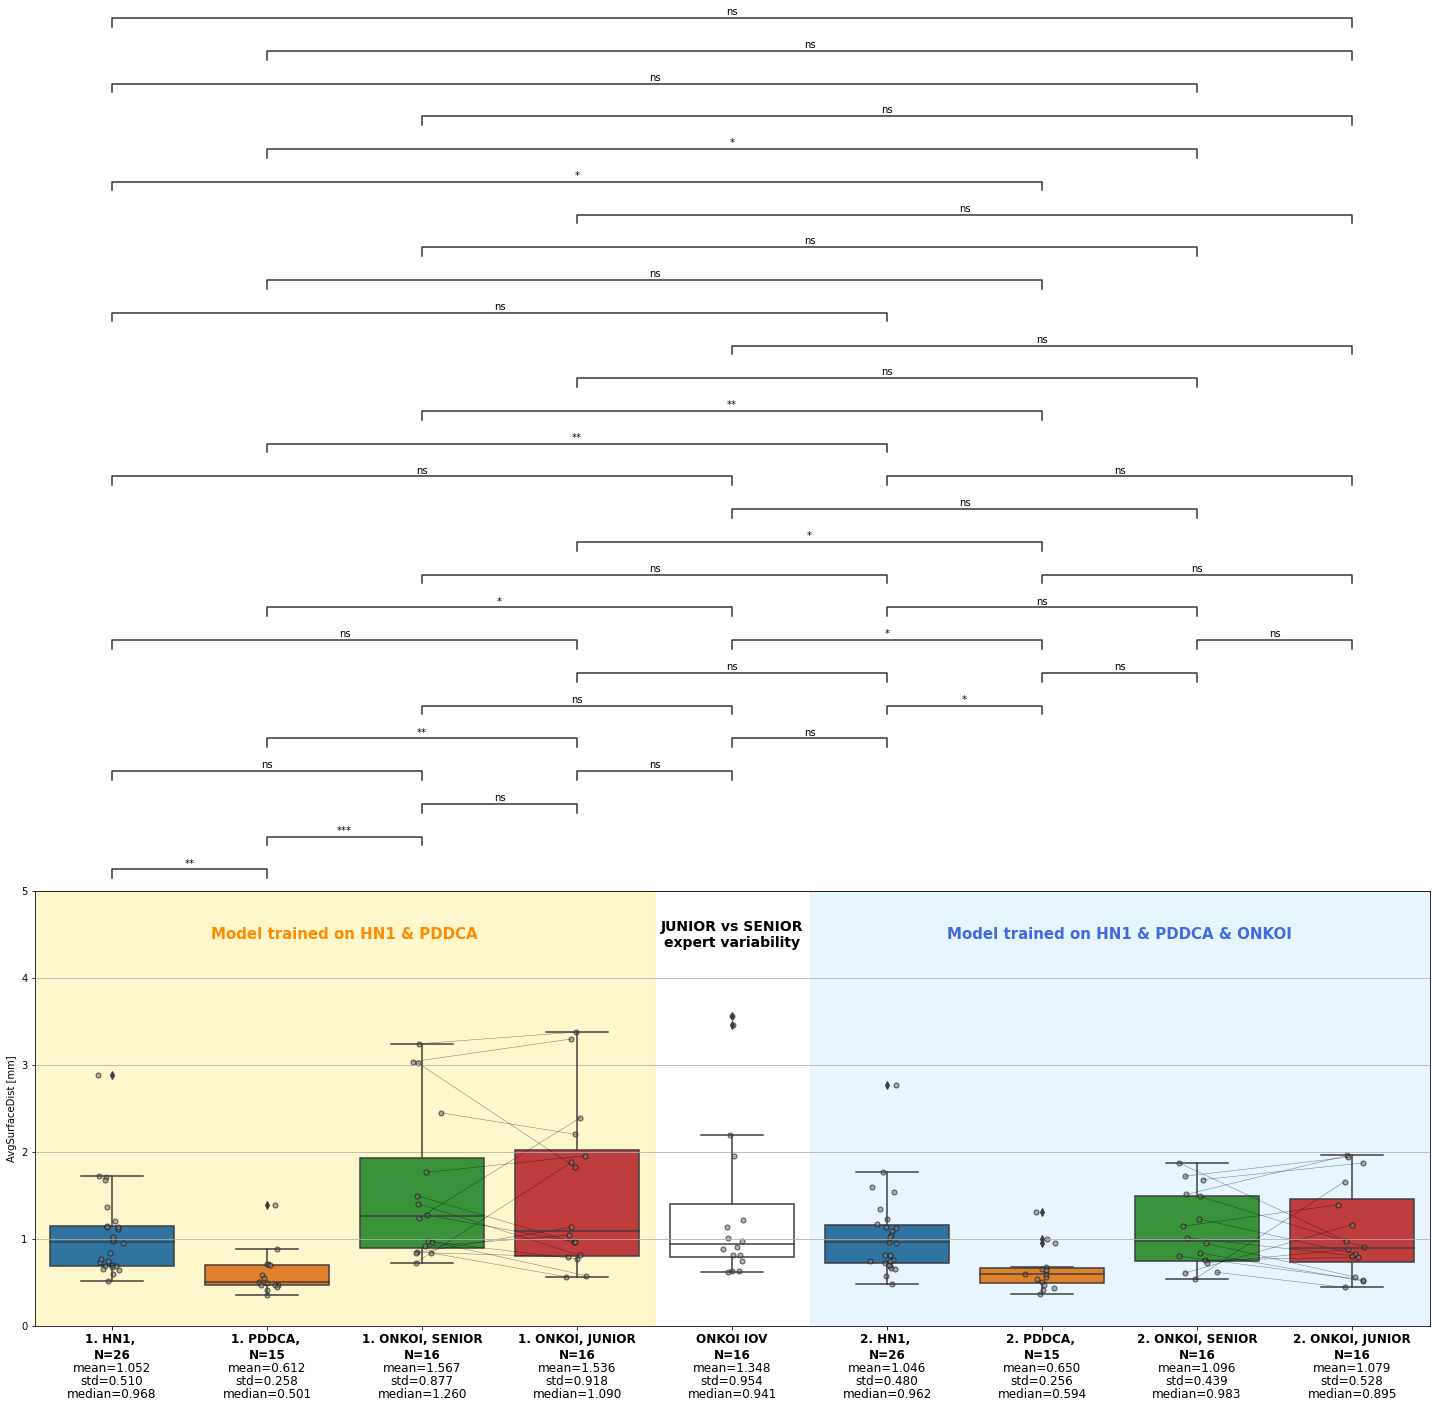

In [20]:
_df = pd.DataFrame()
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_124.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'1. {_ds}, {_subset_name}'] = _t
_t = df_pivot_IOV.loc[:, (metric)].mean(axis=1).reset_index(drop=True)
_df = _df.append(pd.DataFrame(index=_t.index))
_df[f'ONKOI IOV'] = _t
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_129.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'2. {_ds}, {_subset_name}'] = _t
ax = plot_functions.make_boxplot(_df, figsize=figsize, ylimits=ylimits, metric=metric, y_ticks=None, add_lineplot=True, y_label=None, statistics=show_statistics, statistics_kwargs={'test': stat_test})
c_bg = 'gold'
c_text = 'darkorange'
fontsize=15
plt.axvspan(-0.5, 3.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(1.5, text_height, 'Model trained on HN1 & PDDCA', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
c_bg = 'lightskyblue'
c_text = 'royalblue'
plt.axvspan(4.5, 8.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(6.5, text_height, 'Model trained on HN1 & PDDCA & ONKOI', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
plt.text(4, text_height, 'JUNIOR vs SENIOR\nexpert variability', ha='center', va='center', color='k', fontweight='semibold', fontsize=14)
box_colors = []
for patch in ax.artists:
    box_colors.append(patch.get_facecolor())
for enum, patch in enumerate(ax.artists[5:]):
    patch.set_facecolor(box_colors[enum])
ax.artists[4].set_facecolor((0.5, 0.5, 0.5, 0))
if save_plots: plt.savefig(f'figures/SPIE_{metric}_filtered={filter_bad_cases}.{plots_format}', bbox_inches = 'tight', facecolor='white')

In [21]:
_df.loc[_df.idxmax()[0]]

1. HN1,             2.890312
1. PDDCA,                NaN
1. ONKOI, SENIOR         NaN
1. ONKOI, JUNIOR         NaN
ONKOI IOV                NaN
2. HN1,             2.769804
2. PDDCA,                NaN
2. ONKOI, SENIOR         NaN
2. ONKOI, JUNIOR         NaN
Name: /media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1308/1.3.6.1.4.1.40744.29.157183145321798851950598418665449371319/ct.nii.gz, dtype: float64

# ASSD

In [22]:
metric = 'ASSD'
fold = 'all'
ylimits = [0, 5]
text_height = 4.5

## phases comparison

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1. HN1,  v.s. 1. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.798e-03 U_stat=3.300e+02
1. PDDCA,  v.s. 1. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.202e-04 U_stat=1.300e+01
1. ONKOI, SENIOR v.s. 1. ONKOI, JUNIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.370e+02
1. ONKOI, JUNIOR v.s. ONKOI IOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.490e+02
ONKOI IOV v.s. 2. HN1, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.290e+02
2. HN1,  v.s. 2. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.818e-02 U_stat=3.240e+02
2. PDDCA,  v.s. 2. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two

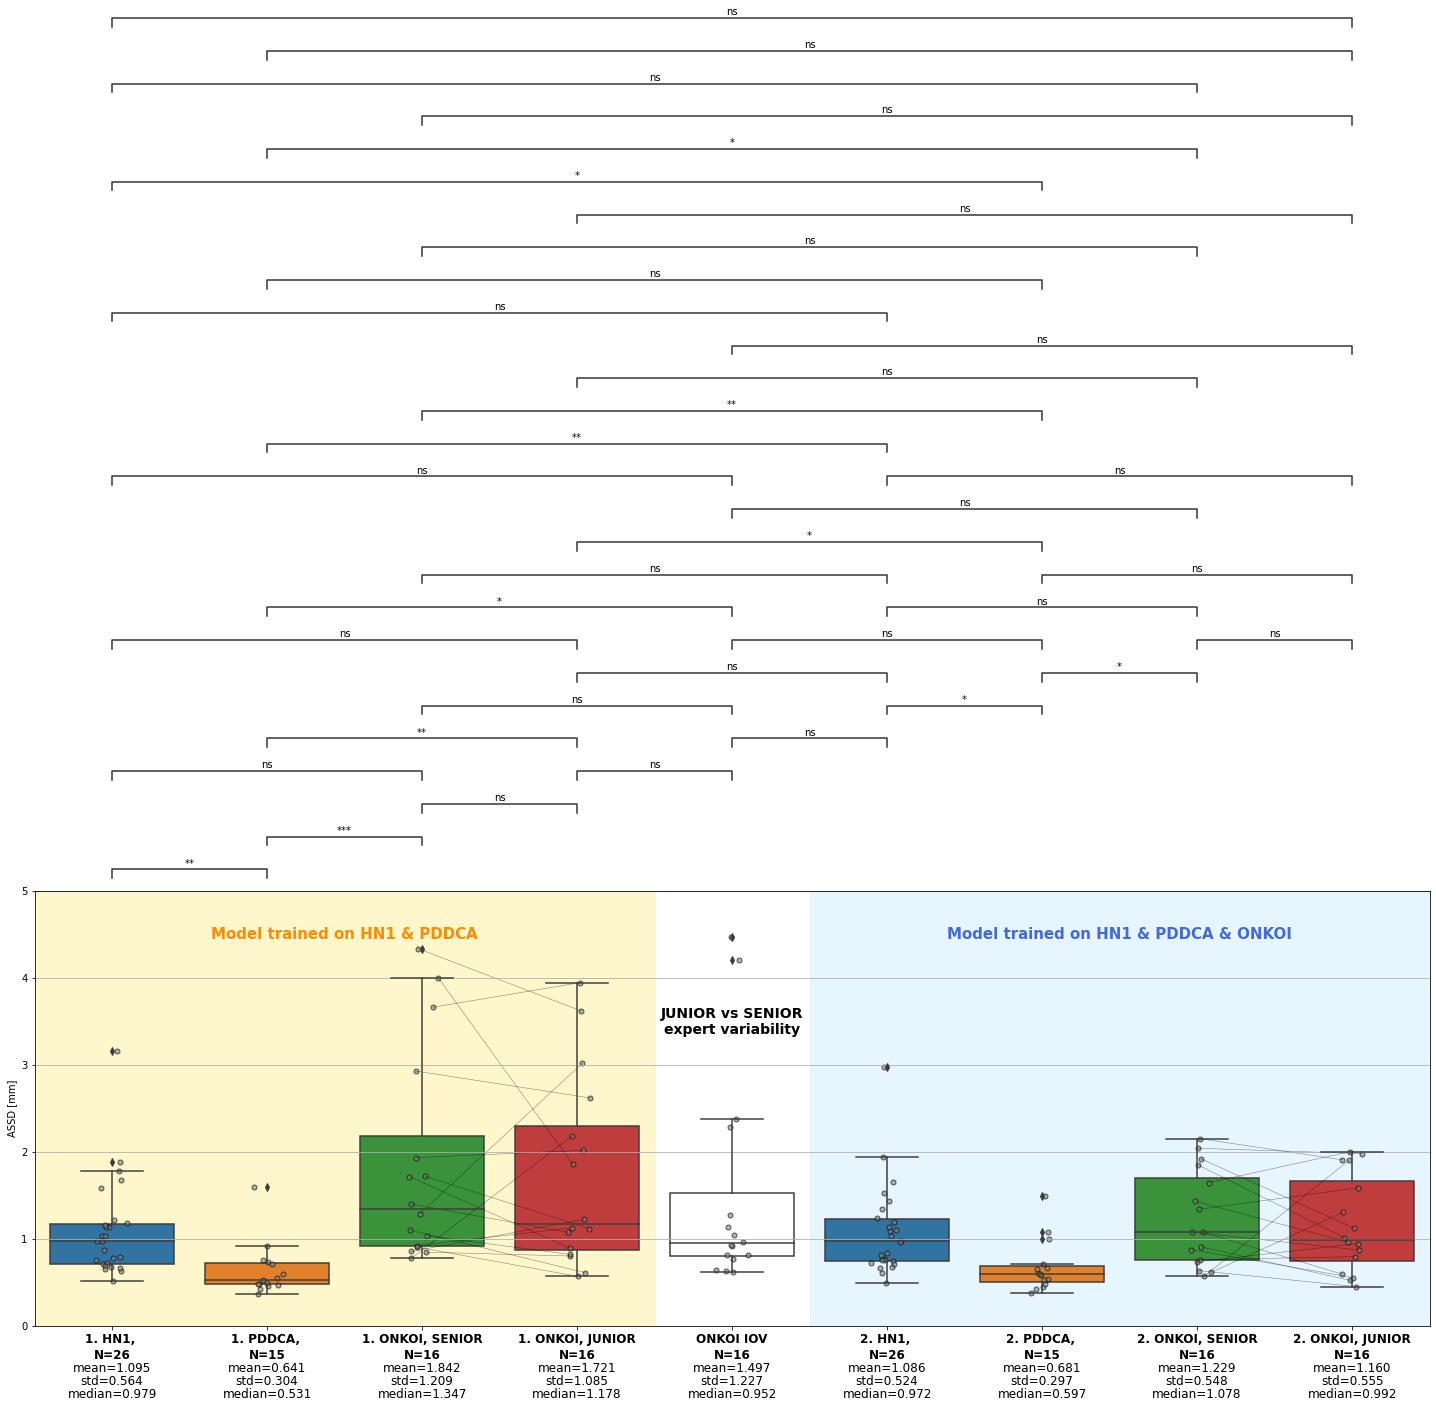

In [23]:
_df = pd.DataFrame()
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_124.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'1. {_ds}, {_subset_name}'] = _t
_t = df_pivot_IOV.loc[:, (metric)].mean(axis=1).reset_index(drop=True)
_df = _df.append(pd.DataFrame(index=_t.index))
_df[f'ONKOI IOV'] = _t
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_129.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'2. {_ds}, {_subset_name}'] = _t
ax = plot_functions.make_boxplot(_df, figsize=figsize, ylimits=ylimits, metric=metric, y_ticks=None, add_lineplot=True, y_label=None, statistics=show_statistics, statistics_kwargs={'test': stat_test})
c_bg = 'gold'
c_text = 'darkorange'
fontsize=15
plt.axvspan(-0.5, 3.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(1.5, text_height, 'Model trained on HN1 & PDDCA', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
c_bg = 'lightskyblue'
c_text = 'royalblue'
plt.axvspan(4.5, 8.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(6.5, text_height, 'Model trained on HN1 & PDDCA & ONKOI', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
plt.text(4, text_height-1, 'JUNIOR vs SENIOR\nexpert variability', ha='center', va='center', color='k', fontweight='semibold', fontsize=14)
box_colors = []
for patch in ax.artists:
    box_colors.append(patch.get_facecolor())
for enum, patch in enumerate(ax.artists[5:]):
    patch.set_facecolor(box_colors[enum])
ax.artists[4].set_facecolor((0.5, 0.5, 0.5, 0))
if save_plots: plt.savefig(f'figures/SPIE_{metric}_filtered={filter_bad_cases}.{plots_format}', bbox_inches = 'tight', facecolor='white')

In [24]:
_df[_df > 3]

,"1. HN1,","1. PDDCA,","1. ONKOI, SENIOR","1. ONKOI, JUNIOR",ONKOI IOV,"2. HN1,","2. PDDCA,","2. ONKOI, SENIOR","2. ONKOI, JUNIOR"
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1004/1.3.6.1.4.1.40744.29.33371661027192187491509798061184654147/ct.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1006/1.3.6.1.4.1.40744.29.54712191493031700552055858867725815574/ct.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1022/1.3.6.1.4.1.40744.29.19037093530189411798567915021135260094/ct.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1026/1.3.6.1.4.1.40744.29.129528600857276767696995028185189752874/ct.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/media/medical/projects/head_and_neck/Head-Neck-Radiomics-HN1/HN1029/1.3.6.1.4.1.40744.29.314615053570845933509438096285307471064/ct.nii.gz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,4.468931,NaN,NaN,NaN,NaN


# Surface Dice

In [25]:
metric = 'SurfaceDice'
fold = 'all'
ylimits = [-0.015, 1.015]
text_height = 0.15

## phases comparison

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1. HN1,  v.s. 1. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.956e-03 U_stat=4.900e+01
1. PDDCA,  v.s. 1. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.227e-04 U_stat=2.380e+02
1. ONKOI, SENIOR v.s. 1. ONKOI, JUNIOR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.160e+02
1. ONKOI, JUNIOR v.s. ONKOI IOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.030e+02
ONKOI IOV v.s. 2. HN1, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.940e+02
2. HN1,  v.s. 2. PDDCA, : Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.125e-03 U_stat=5.700e+01
2. PDDCA,  v.s. 2. ONKOI, SENIOR: Mann-Whitney-Wilcoxon test two

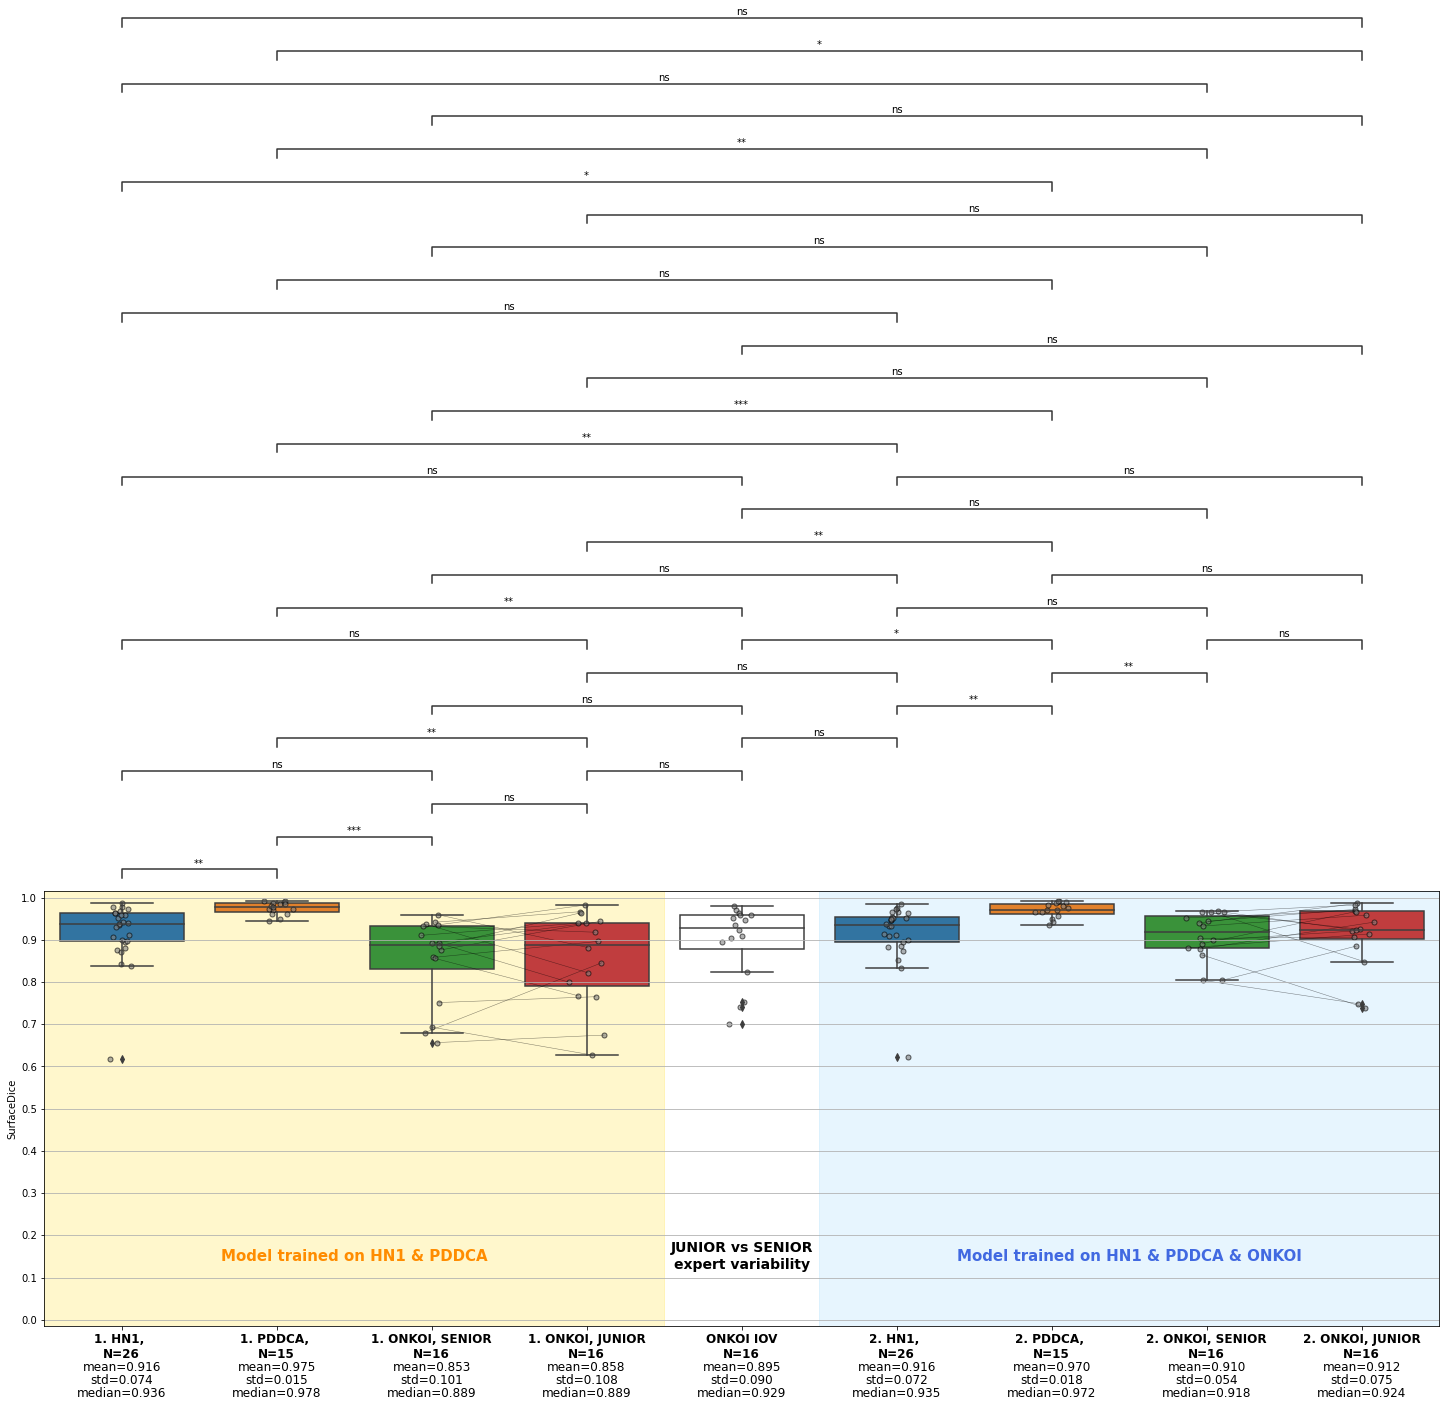

In [26]:
_df = pd.DataFrame()
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_124.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'1. {_ds}, {_subset_name}'] = _t
_t = df_pivot_IOV.loc[:, (metric)].mean(axis=1).reset_index(drop=True)
_df = _df.append(pd.DataFrame(index=_t.index))
_df[f'ONKOI IOV'] = _t
for _ds, _subsets in dataset_subset_dict.items():
    for _subset_name, _subset in _subsets.items():
        _t = df_pivot_129.loc[:, (_ds, _subset, metric, phase, fold, [1, 2])].mean(axis=1)
        _df[f'2. {_ds}, {_subset_name}'] = _t
ax = plot_functions.make_boxplot(_df, figsize=figsize, ylimits=ylimits, metric=metric, y_ticks=None, add_lineplot=True, y_label=None, statistics=show_statistics, statistics_kwargs={'test': stat_test})
c_bg = 'gold'
c_text = 'darkorange'
fontsize=15
plt.axvspan(-0.5, 3.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(1.5, text_height, 'Model trained on HN1 & PDDCA', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
c_bg = 'lightskyblue'
c_text = 'royalblue'
plt.axvspan(4.5, 8.5, alpha=0.2, color=c_bg, zorder=0)
plt.text(6.5, text_height, 'Model trained on HN1 & PDDCA & ONKOI', ha='center', va='center', color=c_text, fontweight='semibold', fontsize=fontsize)
plt.text(4, text_height, 'JUNIOR vs SENIOR\nexpert variability', ha='center', va='center', color='k', fontweight='semibold', fontsize=14)
box_colors = []
for patch in ax.artists:
    box_colors.append(patch.get_facecolor())
for enum, patch in enumerate(ax.artists[5:]):
    patch.set_facecolor(box_colors[enum])
ax.artists[4].set_facecolor((0.5, 0.5, 0.5, 0))
if save_plots: plt.savefig(f'figures/SPIE_{metric}_filtered={filter_bad_cases}.{plots_format}', bbox_inches = 'tight', facecolor='white')

In [27]:
pth = f"/media/medical/projects/head_and_neck/nnUnet/{dataset}/results/foldall/Task113_onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed/test/onkoi-2019-double-reference-10-train-20-test-noBadCasesInTrain-spatialFixed_043.nii.gz", 

In [28]:
# np.unique(sitk.GetArrayFromImage(sitk.ReadImage(pth)))